In [114]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from pygsp import graphs, filters, plotting
from numpy import pi
import ephem
from tqdm import tqdm
import reverse_geocoder as rg
from collections import Counter
import networkx as nx
from multiprocessing import Pool
from scipy import sparse, stats, spatial
from pygsp import graphs, filters, plotting
from mpl_toolkits.basemap import Basemap

plt.rcParams['figure.figsize'] = (17, 5)
plotting.BACKEND = 'matplotlib'

In [115]:
def read_tle(tle_file):
    tle = open(tle_file)
    lines = tle.readlines()
    return lines

In [116]:
lines_current = read_tle('Dataset/satellite_tle_current.txt')
#lines_globalstar = read_tle('Dataset/telecom_sat_tle/globalstar.csv')
#lines_inmarsat = read_tle('Dataset/telecom_sat_tle/inmarsat.csv')
#lines_intelsat = read_tle('Dataset/telecom_sat_tle/intelsat.csv')
#lines_iridium = read_tle('Dataset/telecom_sat_tle/iridium.csv')
#lines_orbcom = read_tle('Dataset/telecom_sat_tle/orbcom.csv')
lines_tot = lines_current#+lines_globalstar[:-1]+lines_inmarsat[:-1]+lines_intelsat[:-1]+lines_iridium[:-1]+lines_orbcom[:-1]
#useless as none of the satellites are in the other merged csv file hence everything is deleted

In [117]:
lines_tot.count('\n')

0

In [118]:
def compute_tle_informations(lines):
    numb_element = len(lines)
    names = []
    long = []
    lat = []
    elevation_km = []
    for i in range(0,numb_element-1,3):
        temp = ephem.readtle(lines[i], lines[i+1], lines[i+2])
        temp.compute('2017/10/12')
        try:
            long.append(temp.sublong*180/pi)
            lat.append(temp.sublat*180/pi)
            elevation_km.append(temp.elevation/1000)
            names.append(temp.name[2:])
        except:
            print('Index number {} is not compatible to perform computation' .format(i))
    return names,long,lat,elevation_km

In [129]:
names,long,lat,elevation_km = compute_tle_informations(lines_tot)
data = pd.DataFrame(np.transpose([names,long,lat,elevation_km]))
data.columns = ['OBJECT_NAME','Longitude [°]','Latitude [°]','Elevation [km]']

#useless to compute this single longitude/lattitude.

Index number 5361 is not compatible to perform computation
Index number 49563 is not compatible to perform computation


In [130]:
coord = list(zip(lat,long))
result = rg.search(coord)
countries = [temp['cc'] for temp in result]
data['Country'] = countries

In [131]:
data

,OBJECT_NAME,Longitude [°],Latitude [°],Elevation [km],Country
0,VANGUARD 1,-63.01315328238157,-26.65173623575367,950.1053125,AR
1,VANGUARD 2,33.607191075144456,-32.25819456312109,2825.77825,ZA
2,VANGUARD R/B,158.90670062542114,1.4622271746404283,746.4226875,FM
3,VANGUARD R/B,-117.00344908625789,12.395302654786787,2056.953375,MX
4,VANGUARD 3,-14.979412519707317,-30.811335100669776,3271.14,SH
5,EXPLORER 7,165.9903034740197,9.845133707399345,517.82565625,MH
6,TIROS 1,-49.25634633165384,48.00799948723977,649.5704375,CA
7,TRANSIT 2A,-139.31569634983023,38.87243705724013,970.6335,US
8,SOLRAD 1 (GREB),-0.5891223854904057,-47.06758489136657,745.2826875,SH
9,THOR ABLESTAR R/B,53.80098686574566,-2.196176677848373,829.1221875,SC


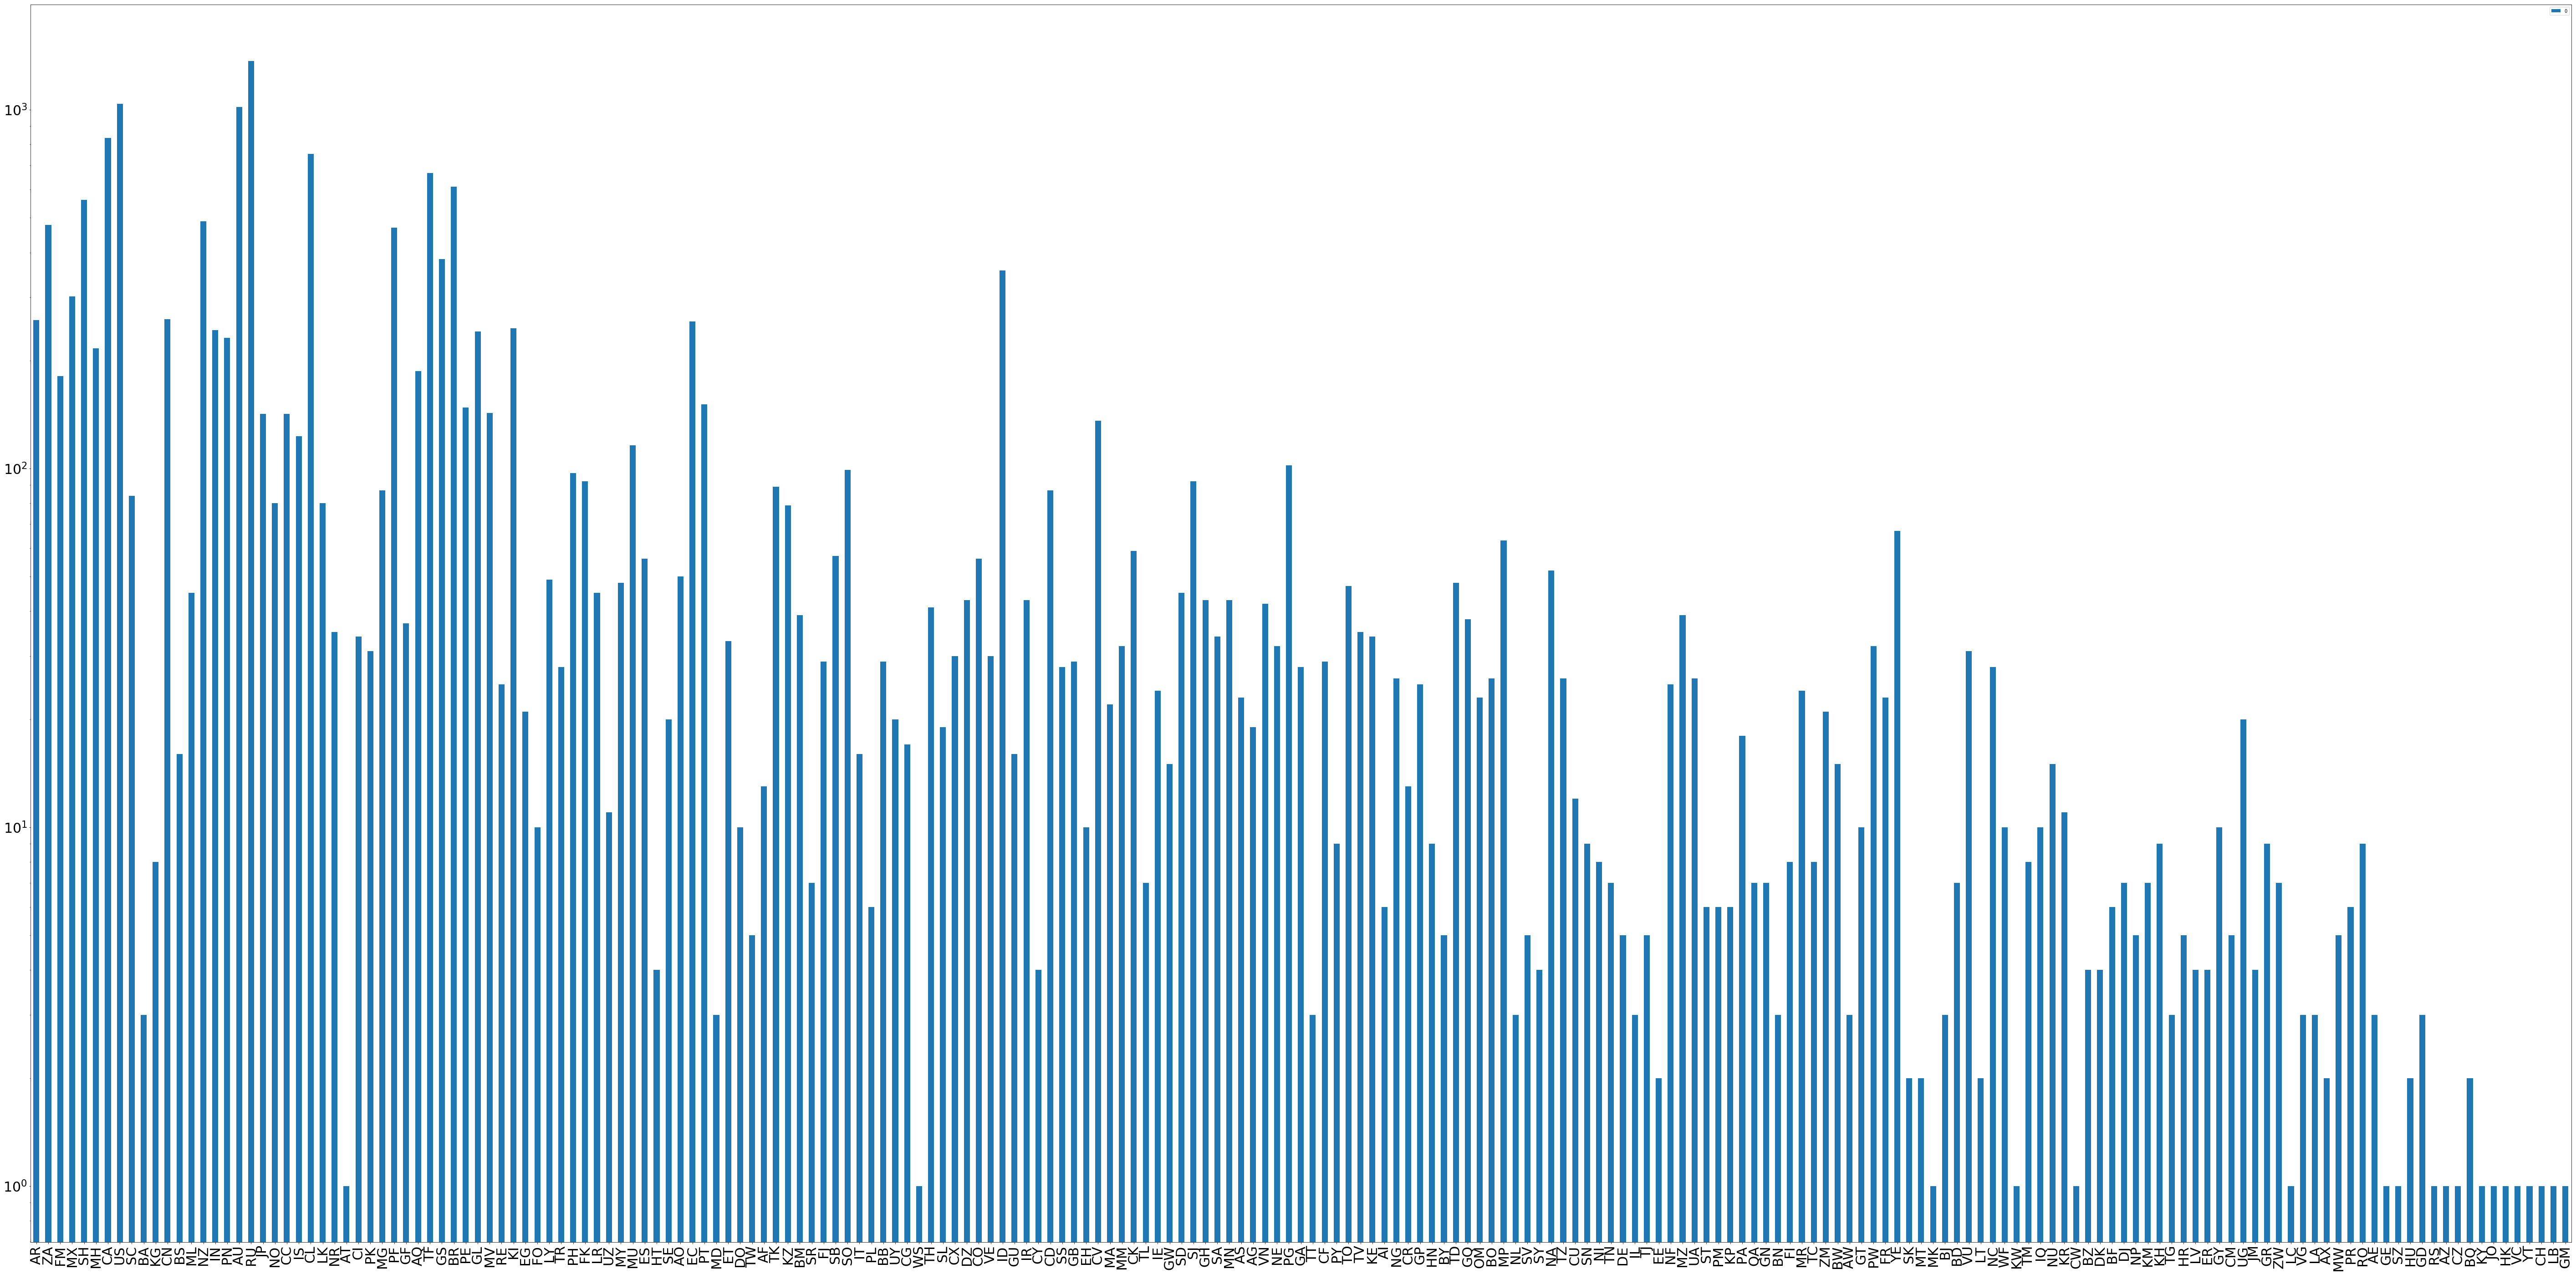

In [132]:
letter_counts = Counter(data['Country'])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',figsize=(100,50),logy=True,fontsize=30)

In [133]:
len(np.unique(data['Country']))

213

In [134]:
sioi = pd.read_csv('Dataset/satellites_in_orbit_info.csv')

In [135]:
no_deb = data[["DEB" not in x for x in data.OBJECT_NAME ]].drop_duplicates(subset = "OBJECT_NAME")

In [136]:
sioi = sioi[["DEB" not in x for x in sioi.OBJECT_NAME ]].drop_duplicates(subset = "OBJECT_NAME")

In [137]:
data_m = pd.merge(no_deb,sioi,how='inner', on="OBJECT_NAME")

In [138]:
mask = (data_m['Elevation [km]'].astype('float64') < 30000)
data_final = data_m[mask]

In [139]:
data_final = data_final.dropna(axis= 0, subset=["PERIOD"])

In [140]:
data_final

,OBJECT_NAME,Longitude [°],Latitude [°],Elevation [km],Country,OBJECT_ID,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,RCSVALUE,LAUNCH,COMMENT
0,VANGUARD 1,-63.01315328238157,-26.65173623575367,950.1053125,AR,1958-002B,5,US,132.75,34.24,3834.0,650.0,MEDIUM,0,1958-03-17,NaN
1,VANGUARD 2,33.607191075144456,-32.25819456312109,2825.77825,ZA,1959-001A,11,US,121.47,32.87,2940.0,553.0,MEDIUM,0,1959-02-17,NaN
2,VANGUARD R/B,158.90670062542114,1.4622271746404283,746.4226875,FM,1958-002A,16,US,137.32,34.28,4223.0,655.0,MEDIUM,0,1958-03-17,NaN
3,VANGUARD 3,-14.979412519707317,-30.811335100669776,3271.14,SH,1959-007A,20,US,124.62,33.35,3263.0,510.0,MEDIUM,0,1959-09-18,NaN
4,EXPLORER 7,165.9903034740197,9.845133707399345,517.82565625,MH,1959-009A,22,US,96.36,50.28,683.0,486.0,MEDIUM,0,1959-10-13,NaN
5,TIROS 1,-49.25634633165384,48.00799948723977,649.5704375,CA,1960-002B,29,US,97.68,48.38,665.0,631.0,MEDIUM,0,1960-04-01,NaN
6,TRANSIT 2A,-139.31569634983023,38.87243705724013,970.6335,US,1960-007A,45,US,100.45,66.69,968.0,592.0,MEDIUM,0,1960-06-22,NaN
7,SOLRAD 1 (GREB),-0.5891223854904057,-47.06758489136657,745.2826875,SH,1960-007B,46,US,99.37,66.69,873.0,584.0,MEDIUM,0,1960-06-22,NaN
8,THOR ABLESTAR R/B,53.80098686574566,-2.196176677848373,829.1221875,SC,1965-065B,1508,US,107.79,90.13,1157.0,1092.0,LARGE,0,1965-08-13,NaN
9,DELTA 1 R/B,16.734574768461957,44.07962984648528,1686.945125,BA,1989-089B,20323,US,99.43,97.12,782.0,681.0,LARGE,0,1989-11-18,NaN


In [141]:
dict_tle = {}
for i in range(0,len(lines_tot)-1,3):
    dict_tle[lines_tot[i][2:].strip('\n')] = (lines_tot[i+1],lines_tot[i+2])

In [142]:
keys = list(dict_tle.keys())
for i in keys:
    if i not in data_final['OBJECT_NAME'].values:
        del dict_tle[i]

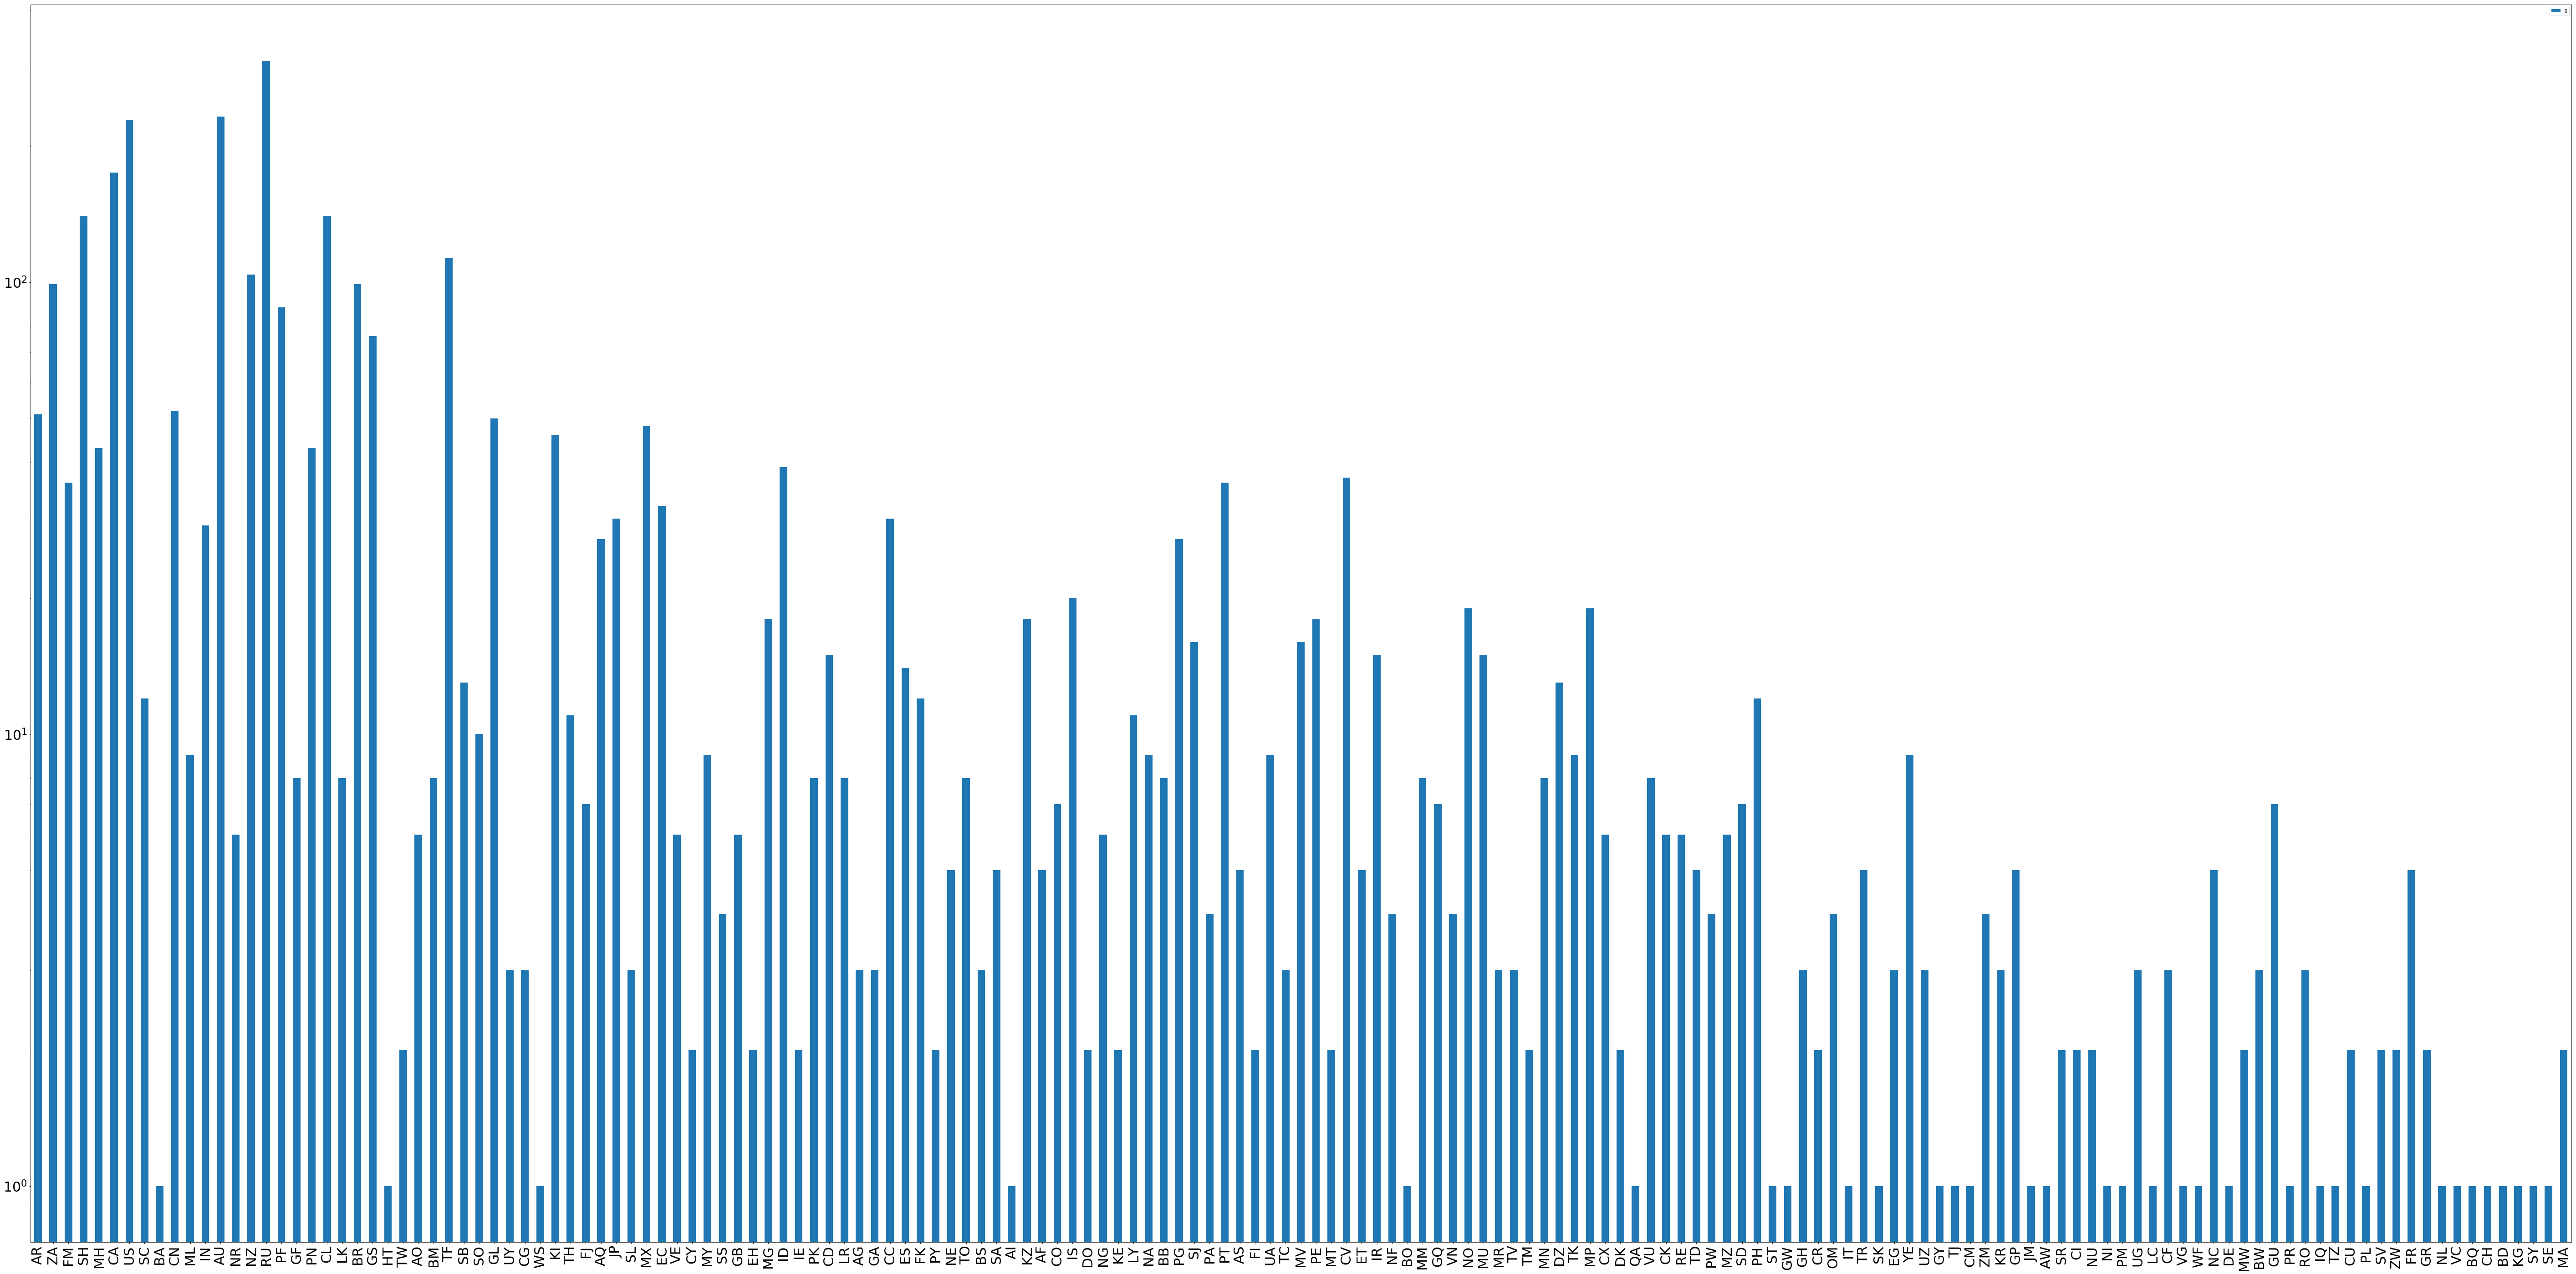

In [143]:
letter_counts = Counter(data_final['Country'])
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar',figsize=(100,50),logy=True,fontsize=30)

In [21]:
from datetime import datetime, timedelta

In [159]:
def satellite_orbit(name):
    orbit_point = []
    line_1, line_2 = dict_tle[name]
    period = int(sioi[sioi.OBJECT_NAME == name].PERIOD.values[0])
    delta_t = int(period*60/nb_point)
    delta_t = timedelta(seconds = delta_t)
    time = datetime(2017,10,12)
    l1, l2 = dict_tle[name]
    temp = ephem.readtle(name, l1, l2)
    for i in range(0,200):
        time = time + delta_t
        temp.compute(time)
        try:
            lat = temp.sublat*180/pi
            long = temp.sublong*180/pi
            orbit_point.append((lat,long))
        except:
            print("ERROR")
    return orbit_point

In [160]:
nb_point = 200
p = Pool()
res = p.map(satellite_orbit, list(dict_tle.keys()))

Process ForkPoolWorker-28:
Process ForkPoolWorker-25:
Process ForkPoolWorker-26:
Process ForkPoolWorker-27:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/Antoine/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/Antoine/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Users/Antoine/anaconda3/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Users/Antoine/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Antoine/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Antoine/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._k

In [161]:
def compute_weight(sat1,sat2):
    compare = np.logical_and(sat1,sat2)
    tot = np.sum(compare)
    if tot==0:
        return float('inf')
    return 1/tot

In [162]:
def compute_grids(res):
    orbit_grids= []
    vertical_offset =90
    horizontal_offset = 180
    shape = (180,360)
    coverage_width = range(-1, 1)
    for stats in res:
        grid = np.zeros(shape)
        for lat, long in stats:
            lat = round(lat) + vertical_offset
            long = round(long) + horizontal_offset
            for i in coverage_width:
                for j in coverage_width:
                    grid[(lat+i)%shape[0]][(long+j)%shape[1]] = 1
        orbit_grids.append(grid)
    return orbit_grids

In [163]:
def compute_adjacency(orbit_grids):
    adjacency = np.zeros([len(res),len(res)])
    for n1, i in enumerate(orbit_grids):
        for n2,j in enumerate(orbit_grids[n1+1:]):
            adjacency[n1,n2+n1+1] = compute_weight(i,j)

    return (adjacency + np.transpose(adjacency))

In [164]:
orbit_grids = compute_grids(res)

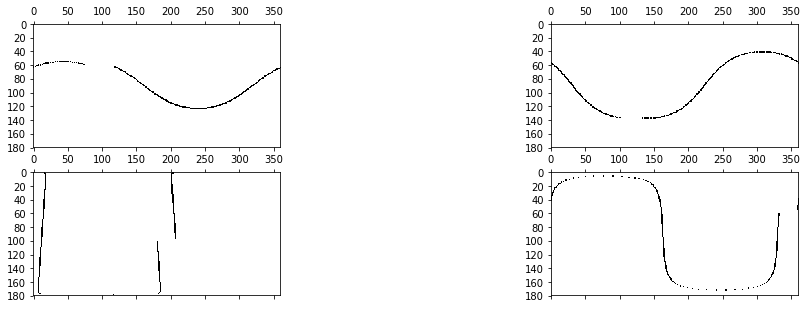

In [165]:
fig, axes = plt.subplots(2,2)
axes[0,0].spy(orbit_grids[0])
axes[0,1].spy(orbit_grids[5])
axes[1,0].spy(orbit_grids[100])
axes[1,1].spy(orbit_grids[1000])

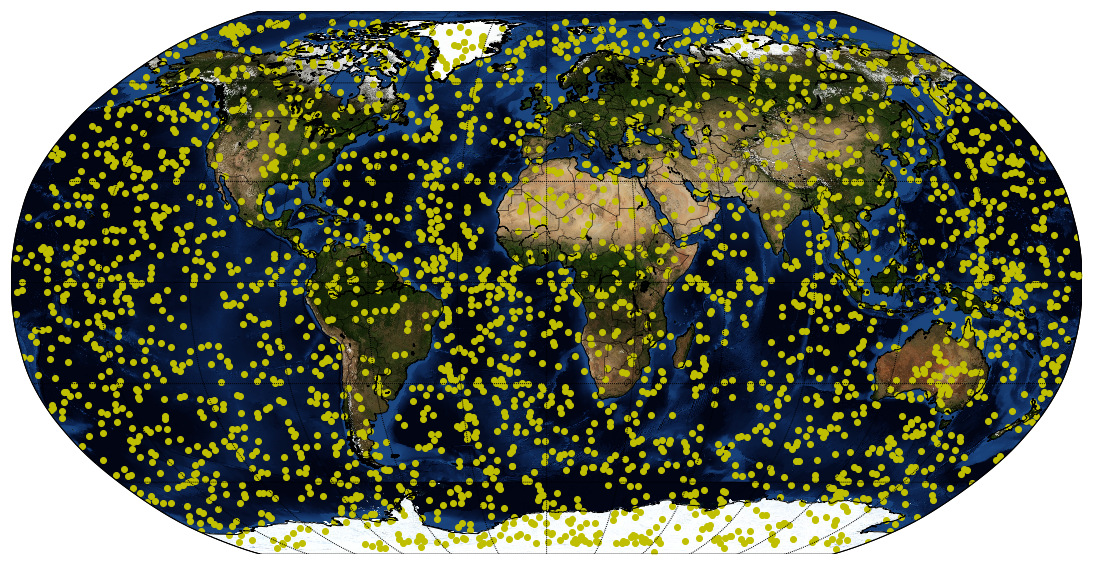

In [204]:
plt.figure(figsize=(20,10))
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0,lon_0=0)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.bluemarble()
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

long = data_final['Longitude [°]'].values
lat = data_final['Latitude [°]'].values

lons,lats = eq_map(long,lat)
eq_map.scatter(lons, lats, marker = 'o', color='y', zorder=1)
    
plt.show()

In [27]:
for n,i in enumerate(orbit_grids):
    orbit_grids[n] = i.flatten()
adja = spatial.distance.pdist(orbit_grids, metric='correlation')
adja = spatial.distance.squareform(adja)

In [28]:
datamean = adja.mean()
adja = np.exp(-adja**2/datamean**2)
np.fill_diagonal(adja,0)

In [29]:
#orbit_grids = compute_grids(res)
#adja = compute_adjacency_bis(orbit_grids)

In [30]:
#graph = nx.from_numpy_matrix(adja)
#nx.draw(graph)

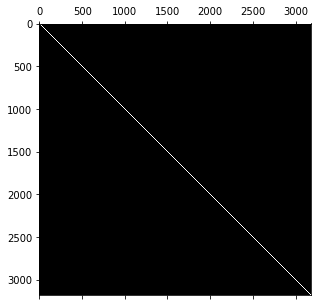

In [31]:
plt.spy(adja)

In [32]:
test = adja*(adja>0.5)

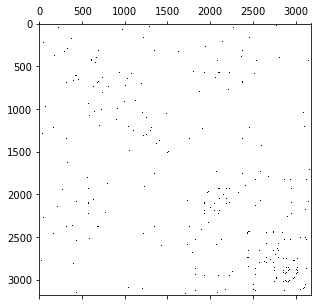

In [33]:
plt.spy(test)

In [34]:
np.count_nonzero(test)

31486

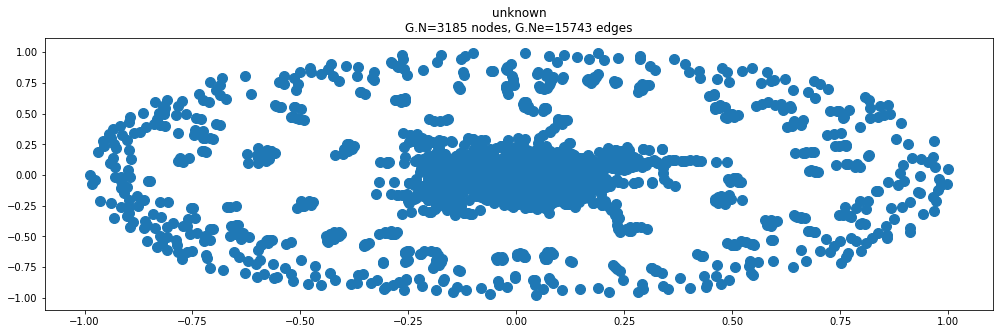

In [35]:
G = graphs.Graph(test)
G.set_coordinates('spring')

G.plot()

In [36]:
graph = nx.from_numpy_matrix(test)
giant_comp = max(nx.connected_component_subgraphs(graph), key=len)

In [205]:
giant_comp